✅ Libraries loaded successfully!
📂 Data Loaded
Employees: (2010, 13), Performance: (10050, 3), Psych: (2010, 9)
PAPI: (40200, 3), Strengths: (28140, 3), Competencies: (100500, 4)
🧾 Data merged. Total rows: 502500

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502500 entries, 0 to 502499
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   employee_id              502500 non-null  object 
 1   fullname                 502500 non-null  object 
 2   nip                      502500 non-null  int64  
 3   company_id               502500 non-null  int64  
 4   area_id                  502500 non-null  int64  
 5   position_id              502500 non-null  int64  
 6   department_id            502500 non-null  int64  
 7   division_id              502500 non-null  int64  
 8   directorate_id           502500 non-null  int64  
 9   grade_id                 502500 non-null  int64  
 10 

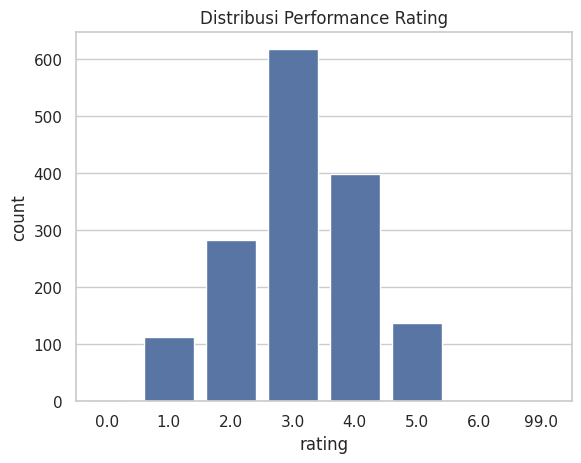

Distribusi rating (%):
rating
3.0     39.729556
4.0     25.627817
2.0     18.158403
5.0      8.821636
1.0      7.276240
0.0      0.193175
99.0     0.128783
6.0      0.064392
Name: proportion, dtype: float64
High performers: 137 | Others: 1413

Rata-rata Kognitif per Rating:
            iq  pauli  faxtor
rating                       
0.0     109.50  44.67   45.00
1.0     109.59  62.88   60.04
2.0     109.57  59.28   60.55
3.0     109.87  58.45   60.81
4.0     107.27  61.31   59.35
5.0     107.79  60.61   61.11
6.0      88.00  70.00   67.00
99.0    101.50  43.50   65.00


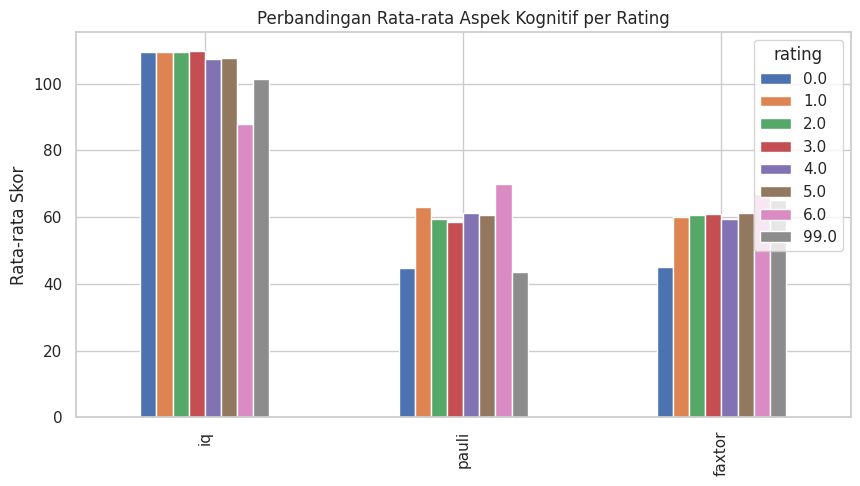

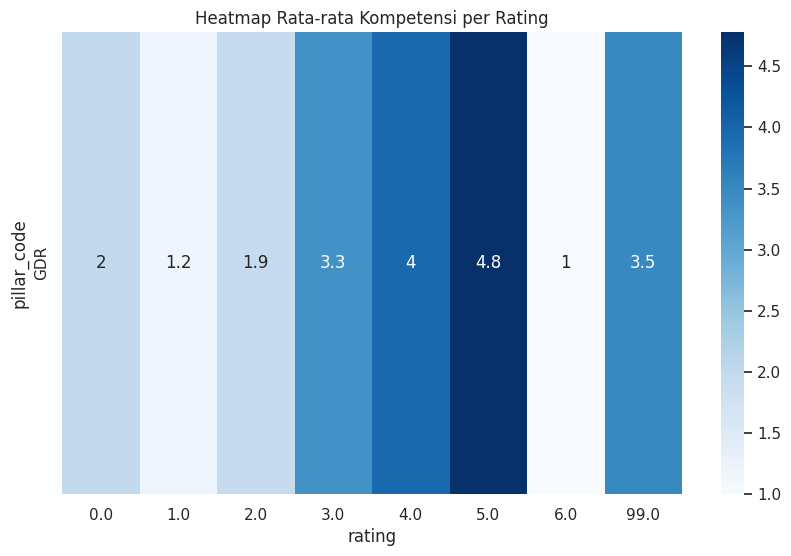

ValueError: could not convert string to float: 'DUP1942'

In [ ]:
# ============================================================
# CASE STUDY: TALENT MATCH INTELLIGENCE - STEP 1 (FULL SCRIPT)
# Discover the Pattern of Success
# ============================================================

# 🧩 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("✅ Libraries loaded successfully!")

# ============================================================
# 🧩 2. LOAD DATA
# Pastikan file Study Case DA.xlsx ada di direktori yang sama
# ============================================================
file = "/content/drive/MyDrive/Rakamin Study Case/Study Case DA.xlsx"

employees = pd.read_excel(file, sheet_name="employees")
performance = pd.read_excel(file, sheet_name="performance_yearly")
psych = pd.read_excel(file, sheet_name="profiles_psych")
papi = pd.read_excel(file, sheet_name="papi_scores")
strengths = pd.read_excel(file, sheet_name="strengths")
competencies = pd.read_excel(file, sheet_name="competencies_yearly")

print("📂 Data Loaded")
print(f"Employees: {employees.shape}, Performance: {performance.shape}, Psych: {psych.shape}")
print(f"PAPI: {papi.shape}, Strengths: {strengths.shape}, Competencies: {competencies.shape}")

# ============================================================
# 🧩 3. GABUNGKAN DATA
# ============================================================
df = (employees
      .merge(performance, on='employee_id', how='left')
      .merge(psych, on='employee_id', how='left')
      .merge(competencies, on='employee_id', how='left')
)

# Filter tahun terbaru kalau ada kolom 'year'
if 'year' in df.columns:
    latest_year = df['year'].max()
    df = df[df['year'] == latest_year]

print(f"🧾 Data merged. Total rows: {len(df)}")

# ============================================================
# 🧩 4. CEK & BERSIHKAN DATA
# ============================================================
print("\nData info:")
print(df.info())
print("\nMissing values (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))

# Contoh: isi missing IQ dengan rata-rata
if 'iq' in df.columns:
    df['iq'] = df['iq'].fillna(df['iq'].mean())

# Drop duplikat jika ada
df = df.drop_duplicates(subset=['employee_id'])
print(f"🧹 Data cleaned. Remaining rows: {len(df)}")

# ============================================================
# 🧩 5. DISTRIBUSI RATING
# ============================================================
sns.countplot(data=df, x='rating')
plt.title("Distribusi Performance Rating")
plt.show()

print("Distribusi rating (%):")
print(df['rating'].value_counts(normalize=True)*100)

# ============================================================
# 🧩 6. PISAHKAN KELOMPOK: HIGH PERFORMER VS OTHERS
# ============================================================
high_perf = df[df['rating'] == 5]
others = df[df['rating'] < 5]

print(f"High performers: {len(high_perf)} | Others: {len(others)}")

# ============================================================
# 🧩 7. ANALISIS KOGNITIF (IQ, Pauli, GTQ)
# ============================================================
cols_cognitive = [c for c in ['iq', 'pauli', 'faxtor', 'gtq_total'] if c in df.columns]

if cols_cognitive:
    cog_summary = df.groupby('rating')[cols_cognitive].mean().round(2)
    print("\nRata-rata Kognitif per Rating:")
    print(cog_summary)

    cog_summary.T.plot(kind='bar', figsize=(10,5))
    plt.title("Perbandingan Rata-rata Aspek Kognitif per Rating")
    plt.ylabel("Rata-rata Skor")
    plt.show()
else:
    print("⚠️ Tidak ditemukan kolom kognitif seperti iq/pauli/faxtor/gtq_total")

# ============================================================
# 🧩 8. ANALISIS KOMPETENSI
# ============================================================
if 'pillar_code' in df.columns and 'score' in df.columns:
    comp_summary = df.groupby(['rating','pillar_code'])['score'].mean().reset_index()
    pivot_comp = comp_summary.pivot(index='pillar_code', columns='rating', values='score')

    plt.figure(figsize=(10,6))
    sns.heatmap(pivot_comp, annot=True, cmap='Blues')
    plt.title("Heatmap Rata-rata Kompetensi per Rating")
    plt.show()
else:
    print("⚠️ Tidak ditemukan data competencies_yearly yang valid.")

# ============================================================
# 🧩 9. ANALISIS WORK PREFERENCE (PAPI)
# ============================================================
if 'employee_id' in papi.columns and 'scale_code' in papi.columns:
    papi_pivot = papi.pivot(index='employee_id', columns='scale_code', values='score')
    papi_merged = papi_pivot.merge(performance[['employee_id','rating']], on='employee_id')

    corr = papi_merged.corr()['rating'].sort_values(ascending=False)
    print("\nKorelasi Skala PAPI dengan Rating:")
    print(corr)

    plt.figure(figsize=(6,8))
    sns.barplot(y=corr.index, x=corr.values, palette='coolwarm')
    plt.title("Korelasi Skala PAPI dengan Performance Rating")
    plt.show()
else:
    print("⚠️ Data PAPI tidak lengkap.")

# ============================================================
# 🧩 10. ANALISIS STRENGTHS (CliftonStrengths)
# ============================================================
if 'theme' in strengths.columns and 'employee_id' in strengths.columns:
    top_strengths = strengths[strengths['employee_id'].isin(high_perf['employee_id'])]
    top10_strengths = top_strengths['theme'].value_counts().head(10)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top10_strengths.values, y=top10_strengths.index, palette='viridis')
    plt.title("Top 10 Strengths pada High Performers")
    plt.xlabel("Jumlah Karyawan")
    plt.ylabel("Tema Strengths")
    plt.show()
else:
    print("⚠️ Data strengths tidak ditemukan atau tidak lengkap.")

# ============================================================
# 🧩 11. DEMOGRAFIS: Pendidikan, Grade, Lama Kerja
# ============================================================
if 'education_id' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x='education_id', hue='rating')
    plt.title("Pendidikan vs Rating")
    plt.show()

if 'years_of_service_months' in df.columns:
    sns.boxplot(data=df, x='rating', y='years_of_service_months')
    plt.title("Masa Kerja vs Rating")
    plt.show()

# ============================================================
# 🧩 12. SIMPAN HASIL RINGKASAN ANALISIS
# ============================================================
df.to_excel("merged_dataset.xlsx", index=False)
print("💾 Dataset gabungan disimpan sebagai merged_dataset.xlsx")

# ============================================================
# 🧩 13. RUMUSKAN DRAFT SUCCESS FORMULA
# ============================================================
# (Contoh saja — nanti kamu sesuaikan bobot dari hasil EDA)
success_formula = {
    "Cognitive": 0.4,
    "Leadership": 0.3,
    "Work_Preference": 0.2,
    "Strengths": 0.1
}

print("\n📊 Draft Success Formula:")
for k,v in success_formula.items():
    print(f"- {k}: {v*100:.0f}% kontribusi")

print("\n✅ STEP 1 SELESAI: Data siap dipakai untuk SQL logic di Step 2")


✅ Libraries loaded successfully!
📂 Data Loaded
Employees: (2010, 13), Performance: (10050, 3), Psych: (2010, 9)
PAPI: (40200, 3), Strengths: (28140, 3), Competencies: (100500, 4)
🧾 Data merged. Total rows: 502500

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502500 entries, 0 to 502499
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   employee_id              502500 non-null  object 
 1   fullname                 502500 non-null  object 
 2   nip                      502500 non-null  int64  
 3   company_id               502500 non-null  int64  
 4   area_id                  502500 non-null  int64  
 5   position_id              502500 non-null  int64  
 6   department_id            502500 non-null  int64  
 7   division_id              502500 non-null  int64  
 8   directorate_id           502500 non-null  int64  
 9   grade_id                 502500 non-null  int64  
 10 

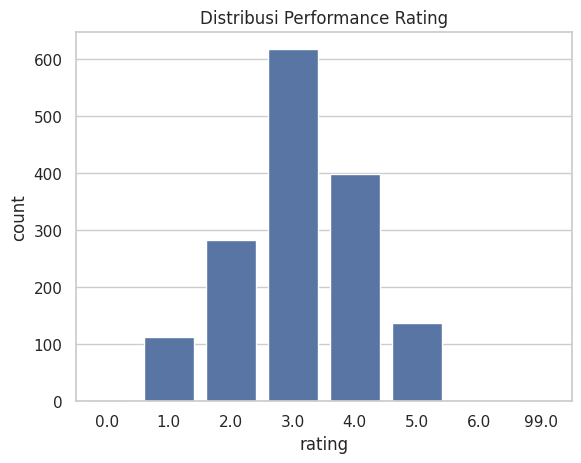

Distribusi rating (%):
rating
3.0     39.729556
4.0     25.627817
2.0     18.158403
5.0      8.821636
1.0      7.276240
0.0      0.193175
99.0     0.128783
6.0      0.064392
Name: proportion, dtype: float64
High performers: 137 | Others: 1413

Rata-rata Kognitif per Rating:
            iq  pauli  faxtor    gtq
rating                              
0.0     109.50  44.67   45.00  30.00
1.0     109.59  62.88   60.04  27.21
2.0     109.57  59.28   60.55  27.22
3.0     109.87  58.45   60.81  27.35
4.0     107.27  61.31   59.35  28.17
5.0     107.79  60.61   61.11  27.22
6.0      88.00  70.00   67.00  23.00
99.0    101.50  43.50   65.00  34.00


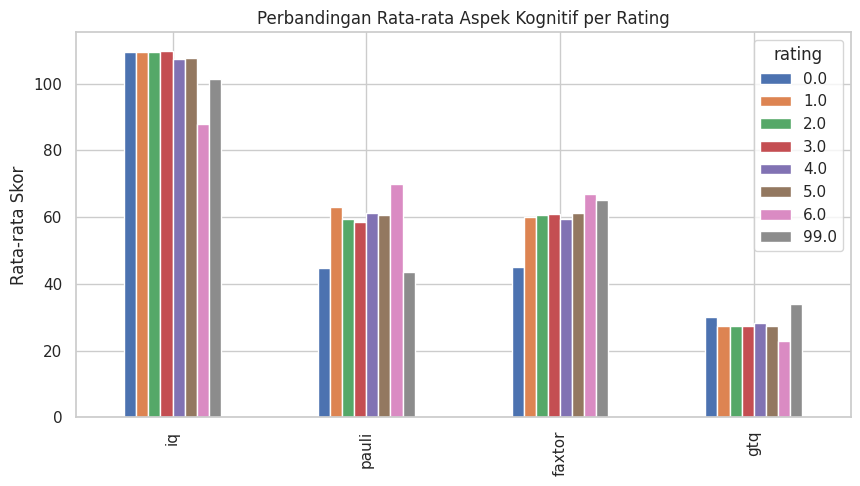

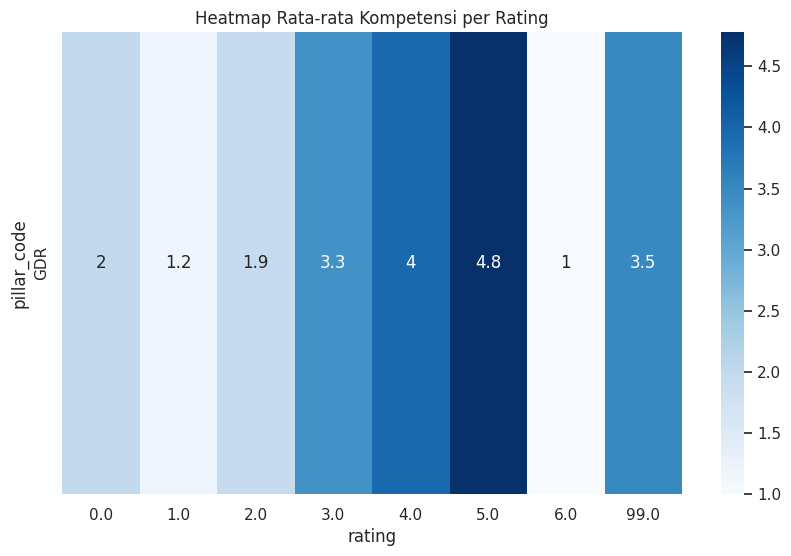


Korelasi Skala PAPI dengan Rating:
rating    1.000000
Papi_F    0.028608
Papi_X    0.025039
Papi_O    0.019060
Papi_V    0.011366
Papi_K    0.008623
Papi_I    0.007575
Papi_E    0.005112
Papi_D    0.004336
Papi_P    0.003502
Papi_Z    0.001836
Papi_R    0.000582
Papi_G    0.000477
Papi_B    0.000367
Papi_T   -0.002027
Papi_S   -0.004363
Papi_A   -0.006523
Papi_L   -0.009893
Papi_W   -0.010555
Papi_C   -0.020840
Papi_N   -0.030488
Name: rating, dtype: float64


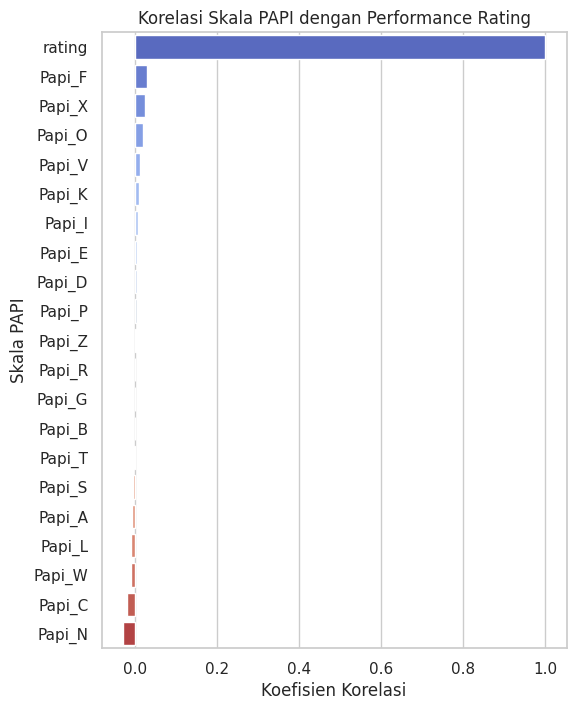


🔥 Top 5 PAPI Scales yang Berkorelasi Positif:
rating    1.000000
Papi_F    0.028608
Papi_X    0.025039
Papi_O    0.019060
Papi_V    0.011366
Name: rating, dtype: float64

❄️ Bottom 5 PAPI Scales yang Berkorelasi Negatif:
Papi_A   -0.006523
Papi_L   -0.009893
Papi_W   -0.010555
Papi_C   -0.020840
Papi_N   -0.030488
Name: rating, dtype: float64


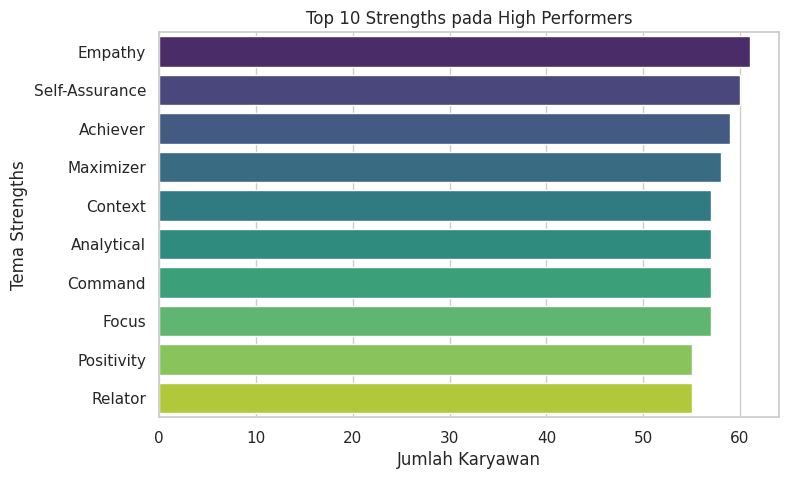

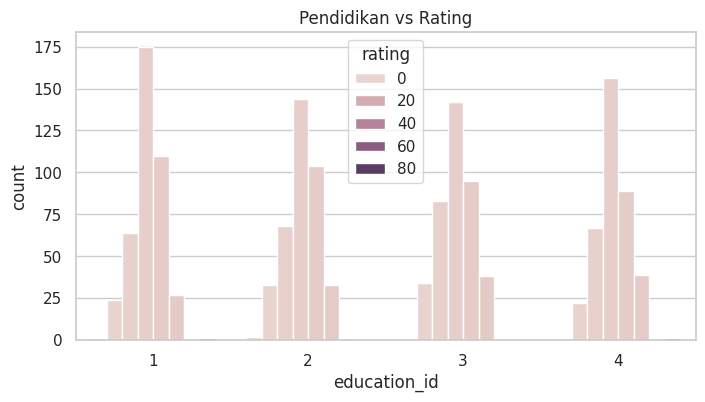

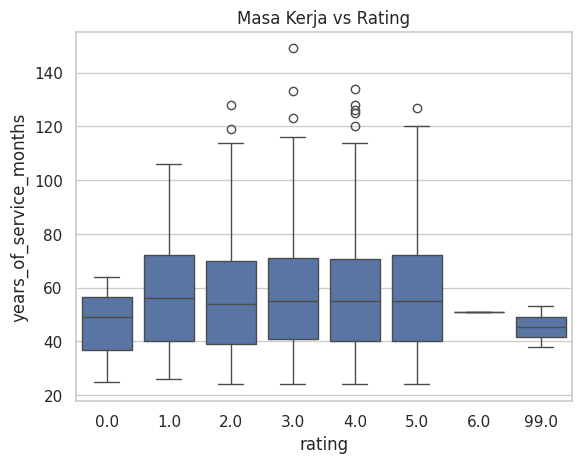

💾 Dataset gabungan disimpan sebagai merged_dataset.xlsx

📊 Draft Success Formula:
- Cognitive: 40% kontribusi
- Leadership: 30% kontribusi
- Work_Preference: 20% kontribusi
- Strengths: 10% kontribusi

✅ STEP 1 SELESAI: Data siap dipakai untuk SQL logic di Step 2


In [2]:
# ============================================================
# CASE STUDY: TALYST MATCH INTELLIGENCE - STEP 1 (FULL FIXED)
# Discover the Pattern of Success
# ============================================================

# 🧩 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("✅ Libraries loaded successfully!")

# ============================================================
# 🧩 2. LOAD DATA
# Pastikan file Study Case DA.xlsx ada di direktori kerja kamu
# ============================================================
file = "/content/drive/MyDrive/Rakamin Study Case/Study Case DA.xlsx"

employees = pd.read_excel(file, sheet_name="employees")
performance = pd.read_excel(file, sheet_name="performance_yearly")
psych = pd.read_excel(file, sheet_name="profiles_psych")
papi = pd.read_excel(file, sheet_name="papi_scores")
strengths = pd.read_excel(file, sheet_name="strengths")
competencies = pd.read_excel(file, sheet_name="competencies_yearly")

print("📂 Data Loaded")
print(f"Employees: {employees.shape}, Performance: {performance.shape}, Psych: {psych.shape}")
print(f"PAPI: {papi.shape}, Strengths: {strengths.shape}, Competencies: {competencies.shape}")

# ============================================================
# 🧩 3. GABUNGKAN DATA
# ============================================================
df = (employees
      .merge(performance, on='employee_id', how='left')
      .merge(psych, on='employee_id', how='left')
      .merge(competencies, on='employee_id', how='left')
)

# Filter tahun terbaru jika ada kolom 'year'
if 'year' in df.columns:
    latest_year = df['year'].max()
    df = df[df['year'] == latest_year]

print(f"🧾 Data merged. Total rows: {len(df)}")

# ============================================================
# 🧩 4. CEK & BERSIHKAN DATA
# ============================================================
print("\nData info:")
print(df.info())
print("\nMissing values (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))

# Contoh: isi missing IQ dengan rata-rata
if 'iq' in df.columns:
    df['iq'] = df['iq'].fillna(df['iq'].mean())

# Drop duplikat jika ada
df = df.drop_duplicates(subset=['employee_id'])
print(f"🧹 Data cleaned. Remaining rows: {len(df)}")

# ============================================================
# 🧩 5. DISTRIBUSI RATING
# ============================================================
sns.countplot(data=df, x='rating')
plt.title("Distribusi Performance Rating")
plt.show()

print("Distribusi rating (%):")
print(df['rating'].value_counts(normalize=True)*100)

# ============================================================
# 🧩 6. PISAHKAN KELOMPOK: HIGH PERFORMER VS OTHERS
# ============================================================
high_perf = df[df['rating'] == 5]
others = df[df['rating'] < 5]

print(f"High performers: {len(high_perf)} | Others: {len(others)}")

# ============================================================
# 🧩 7. ANALISIS KOGNITIF (IQ, Pauli, GTQ)
# ============================================================
cols_cognitive = [c for c in ['iq', 'pauli', 'faxtor', 'gtq_total', 'gtq'] if c in df.columns]

if cols_cognitive:
    cog_summary = df.groupby('rating')[cols_cognitive].mean().round(2)
    print("\nRata-rata Kognitif per Rating:")
    print(cog_summary)

    cog_summary.T.plot(kind='bar', figsize=(10,5))
    plt.title("Perbandingan Rata-rata Aspek Kognitif per Rating")
    plt.ylabel("Rata-rata Skor")
    plt.show()
else:
    print("⚠️ Tidak ditemukan kolom kognitif seperti iq/pauli/faxtor/gtq_total")

# ============================================================
# 🧩 8. ANALISIS KOMPETENSI
# ============================================================
if 'pillar_code' in df.columns and 'score' in df.columns:
    comp_summary = df.groupby(['rating','pillar_code'])['score'].mean().reset_index()
    pivot_comp = comp_summary.pivot(index='pillar_code', columns='rating', values='score')

    plt.figure(figsize=(10,6))
    sns.heatmap(pivot_comp, annot=True, cmap='Blues')
    plt.title("Heatmap Rata-rata Kompetensi per Rating")
    plt.show()
else:
    print("⚠️ Tidak ditemukan data competencies_yearly yang valid.")

# ============================================================
# 🧩 9. ANALISIS WORK PREFERENCE (PAPI) — FIXED VERSION
# ============================================================
if 'employee_id' in papi.columns and 'scale_code' in papi.columns:
    # Pivot jadi wide format: 1 baris = 1 employee, kolom = setiap scale_code
    papi_pivot = papi.pivot(index='employee_id', columns='scale_code', values='score')

    # Merge dengan rating
    papi_merged = papi_pivot.merge(performance[['employee_id','rating']], on='employee_id', how='left')

    # Ambil hanya kolom numerik
    papi_num = papi_merged.select_dtypes(include=[np.number])

    # Hitung korelasi dengan rating
    corr = papi_num.corr()['rating'].sort_values(ascending=False)

    print("\nKorelasi Skala PAPI dengan Rating:")
    print(corr)

    # Visualisasi
    plt.figure(figsize=(6,8))
    sns.barplot(y=corr.index, x=corr.values, palette='coolwarm')
    plt.title("Korelasi Skala PAPI dengan Performance Rating")
    plt.xlabel("Koefisien Korelasi")
    plt.ylabel("Skala PAPI")
    plt.show()

    # Bonus insight
    print("\n🔥 Top 5 PAPI Scales yang Berkorelasi Positif:")
    print(corr.head(5))
    print("\n❄️ Bottom 5 PAPI Scales yang Berkorelasi Negatif:")
    print(corr.tail(5))
else:
    print("⚠️ Data PAPI tidak lengkap atau tidak sesuai format.")

# ============================================================
# 🧩 10. ANALISIS STRENGTHS (CliftonStrengths)
# ============================================================
if 'theme' in strengths.columns and 'employee_id' in strengths.columns:
    top_strengths = strengths[strengths['employee_id'].isin(high_perf['employee_id'])]
    top10_strengths = top_strengths['theme'].value_counts().head(10)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top10_strengths.values, y=top10_strengths.index, palette='viridis')
    plt.title("Top 10 Strengths pada High Performers")
    plt.xlabel("Jumlah Karyawan")
    plt.ylabel("Tema Strengths")
    plt.show()
else:
    print("⚠️ Data strengths tidak ditemukan atau tidak lengkap.")

# ============================================================
# 🧩 11. DEMOGRAFIS: Pendidikan, Grade, Lama Kerja
# ============================================================
if 'education_id' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x='education_id', hue='rating')
    plt.title("Pendidikan vs Rating")
    plt.show()

if 'years_of_service_months' in df.columns:
    sns.boxplot(data=df, x='rating', y='years_of_service_months')
    plt.title("Masa Kerja vs Rating")
    plt.show()

# ============================================================
# 🧩 12. SIMPAN HASIL RINGKASAN ANALISIS
# ============================================================
df.to_excel("merged_dataset.xlsx", index=False)
print("💾 Dataset gabungan disimpan sebagai merged_dataset.xlsx")

# ============================================================
# 🧩 13. RUMUSKAN DRAFT SUCCESS FORMULA
# ============================================================
# (Contoh saja — nanti kamu sesuaikan bobot dari hasil EDA)
success_formula = {
    "Cognitive": 0.4,
    "Leadership": 0.3,
    "Work_Preference": 0.2,
    "Strengths": 0.1
}

print("\n📊 Draft Success Formula:")
for k,v in success_formula.items():
    print(f"- {k}: {v*100:.0f}% kontribusi")

print("\n✅ STEP 1 SELESAI: Data siap dipakai untuk SQL logic di Step 2")